In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import psutil
import time

# Function to get CPU utilization
def get_cpu_utilization():
    return psutil.cpu_percent(interval=0.1)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model
start_time = time.time()
rf_model.fit(X_train, y_train)
elapsed_time = time.time() - start_time

# Log CPU utilization
cpu_utilization = get_cpu_utilization()

# Print training time and CPU utilization
print(f'Training time: {elapsed_time} seconds')
print(f'CPU Utilization during training: {cpu_utilization}%')

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Training time: 0.15494227409362793 seconds
CPU Utilization during training: 26.7%
Test Accuracy: 100.00%


Average CPU Utilization: 32.75%
Average Memory Usage: 53.53%
Average Training Time: 54.32 seconds


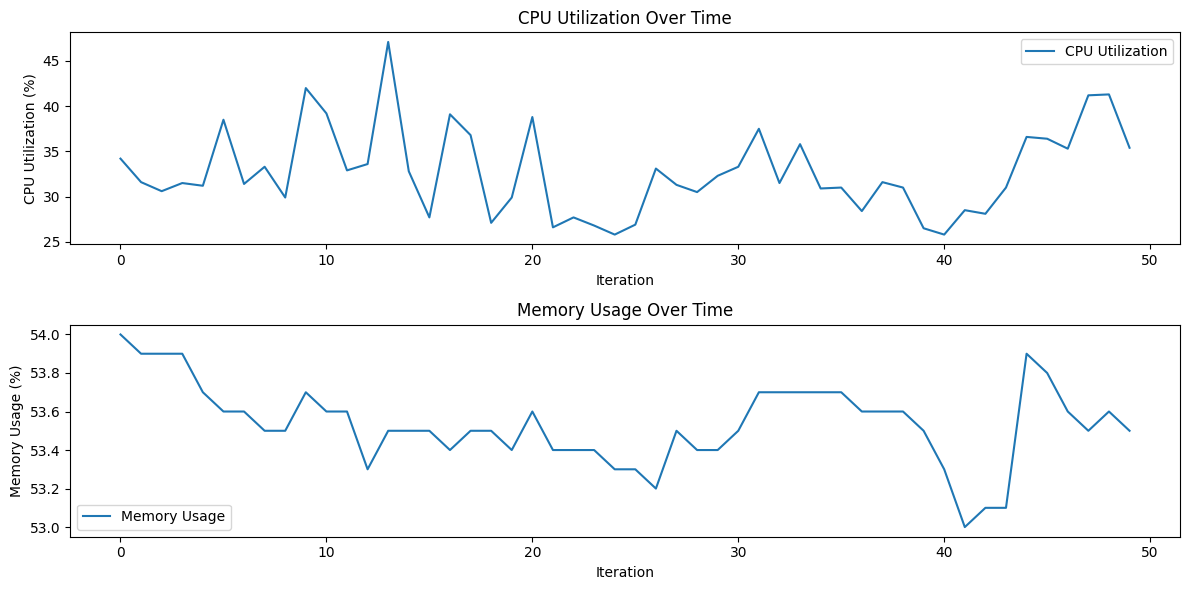

In [3]:
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt

def build_tree(X, y, max_depth=None):
    num_samples, num_features = X.shape
    unique_classes = np.unique(y)

    if len(unique_classes) == 1 or (max_depth is not None and max_depth == 0):
        return {'class': unique_classes[0], 'count': len(y)}

    best_feature, best_threshold = find_best_split(X, y)

    left_indices = X[:, best_feature] <= best_threshold
    right_indices = ~left_indices

    left_tree = build_tree(X[left_indices], y[left_indices], max_depth=max_depth - 1)
    right_tree = build_tree(X[right_indices], y[right_indices], max_depth=max_depth - 1)

    return {
        'feature_index': best_feature,
        'threshold': best_threshold,
        'left': left_tree,
        'right': right_tree
    }

def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    for feature_index in range(num_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            left_indices = X[:, feature_index] <= threshold
            right_indices = ~left_indices

            gini_left = calculate_gini(y[left_indices])
            gini_right = calculate_gini(y[right_indices])

            gini = (len(y[left_indices]) / num_samples) * gini_left + \
                   (len(y[right_indices]) / num_samples) * gini_right

            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def train_random_forest(X, y, n_estimators=100, max_depth=None):
    trees = []
    cpu_utilization = []
    memory_usage = []
    training_times = []

    for _ in range(n_estimators):
        start_time = time.time()

        # Log CPU utilization
        cpu_percent = psutil.cpu_percent(interval=1)
        cpu_utilization.append(cpu_percent)

        # Log memory usage
        memory_percent = psutil.virtual_memory().percent
        memory_usage.append(memory_percent)

        # Randomly sample data with replacement (bootstrapping)
        indices = np.random.choice(len(X), len(X), replace=True)
        X_bootstrap = X[indices]
        y_bootstrap = y[indices]

        # Train a decision tree on the bootstrapped data
        tree = build_tree(X_bootstrap, y_bootstrap, max_depth=max_depth)
        trees.append(tree)

        end_time = time.time()
        training_time = end_time - start_time
        training_times.append(training_time)

    return trees, cpu_utilization, memory_usage, training_times

def predict_random_forest(trees, X):
    predictions = np.array([predict_tree(x, tree) for x in X for tree in trees])
    predictions = predictions.reshape(len(X), len(trees))
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)

def predict_tree(x, tree):
    if 'class' in tree:
        return tree['class']
    else:
        if x[tree['feature_index']] <= tree['threshold']:
            return predict_tree(x, tree['left'])
        else:
            return predict_tree(x, tree['right'])

# Generate synthetic data for demonstration
np.random.seed(42)
X_synthetic = np.random.rand(100, 5)
y_synthetic = (X_synthetic[:, 0] + X_synthetic[:, 1] + X_synthetic[:, 2] > 1.5).astype(int)

# Train Random Forest and log resource utilization
start_time = time.time()
trees, cpu_logs, memory_logs, _ = train_random_forest(X_synthetic, y_synthetic, n_estimators=50, max_depth=3)
end_time = time.time()
training_time = end_time - start_time

# Plot CPU and memory utilization over time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(cpu_logs, label='CPU Utilization')
plt.title('CPU Utilization Over Time')
plt.xlabel('Iteration')
plt.ylabel('CPU Utilization (%)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(memory_logs, label='Memory Usage')
plt.title('Memory Usage Over Time')
plt.xlabel('Iteration')
plt.ylabel('Memory Usage (%)')
plt.legend()
# Print information
average_cpu = np.mean(cpu_logs)
average_memory = np.mean(memory_logs)
average_time = np.mean(training_times)

print(f"Average CPU Utilization: {average_cpu:.2f}%")
print(f"Average Memory Usage: {average_memory:.2f}%")
print(f"Average Training Time: {training_time:.2f} seconds")



plt.tight_layout()
plt.show()


Average CPU Utilization: 34.19%
Average Memory Usage: 53.47%
Average Training Time: 54.38 seconds


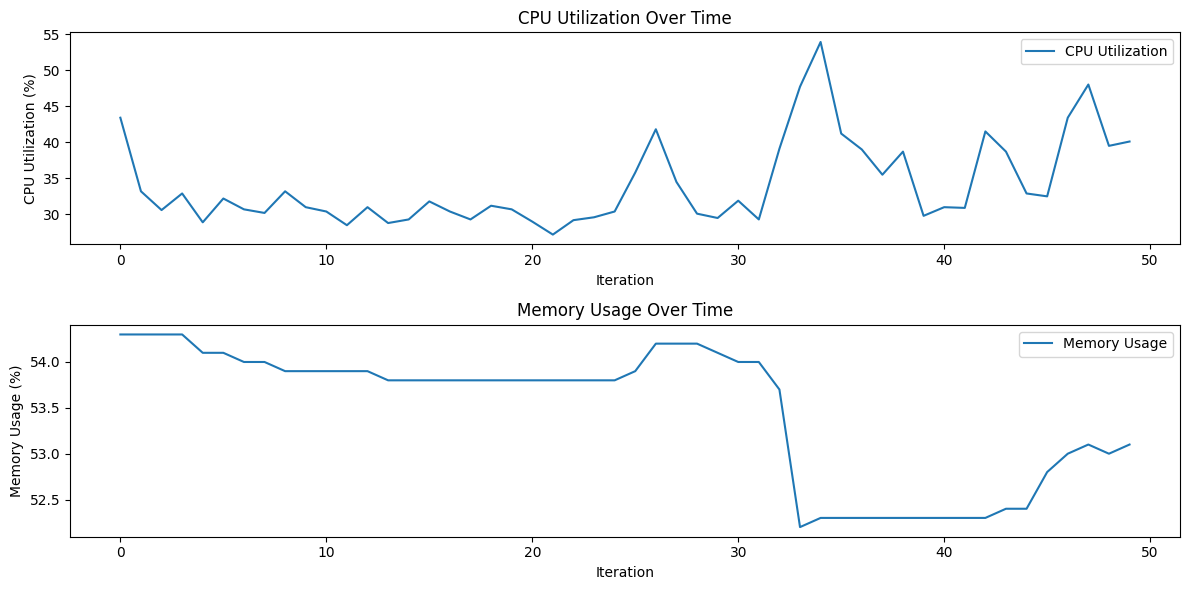

In [4]:
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt

def build_tree(X, y, max_depth=None):
    num_samples, num_features = X.shape
    unique_classes = np.unique(y)

    if len(unique_classes) == 1 or (max_depth is not None and max_depth == 0):
        return {'class': unique_classes[0], 'count': len(y)}

    best_feature, best_threshold = find_best_split(X, y)

    left_indices = X[:, best_feature] <= best_threshold
    right_indices = ~left_indices

    left_tree = build_tree(X[left_indices], y[left_indices], max_depth=max_depth - 1)
    right_tree = build_tree(X[right_indices], y[right_indices], max_depth=max_depth - 1)

    return {
        'feature_index': best_feature,
        'threshold': best_threshold,
        'left': left_tree,
        'right': right_tree
    }

def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    for feature_index in range(num_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            left_indices = X[:, feature_index] <= threshold
            right_indices = ~left_indices

            gini_left = calculate_gini(y[left_indices])
            gini_right = calculate_gini(y[right_indices])

            gini = (len(y[left_indices]) / num_samples) * gini_left + \
                   (len(y[right_indices]) / num_samples) * gini_right

            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def train_random_forest(X, y, n_estimators=100, max_depth=None):
    trees = []
    cpu_utilization = []
    memory_usage = []
    training_times = []

    for _ in range(n_estimators):
        start_time = time.time()

        # Log CPU utilization
        cpu_percent = psutil.cpu_percent(interval=1)
        cpu_utilization.append(cpu_percent)

        # Log memory usage
        memory_percent = psutil.virtual_memory().percent
        memory_usage.append(memory_percent)

        # Randomly sample data with replacement (bootstrapping)
        indices = np.random.choice(len(X), len(X), replace=True)
        X_bootstrap = X[indices]
        y_bootstrap = y[indices]

        # Train a decision tree on the bootstrapped data
        tree = build_tree(X_bootstrap, y_bootstrap, max_depth=max_depth)
        trees.append(tree)

        end_time = time.time()
        training_time = end_time - start_time
        training_times.append(training_time)

    return trees, cpu_utilization, memory_usage, training_times

def predict_random_forest(trees, X):
    predictions = np.array([predict_tree(x, tree) for x in X for tree in trees])
    predictions = predictions.reshape(len(X), len(trees))
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)

def predict_tree(x, tree):
    if 'class' in tree:
        return tree['class']
    else:
        if x[tree['feature_index']] <= tree['threshold']:
            return predict_tree(x, tree['left'])
        else:
            return predict_tree(x, tree['right'])

# Generate synthetic data for demonstration
np.random.seed(42)
X_synthetic = np.random.rand(100, 5)
y_synthetic = (X_synthetic[:, 0] + X_synthetic[:, 1] + X_synthetic[:, 2] > 1.5).astype(int)

# Train Random Forest and log resource utilization
start_time = time.time()
trees, cpu_logs, memory_logs, _ = train_random_forest(X_synthetic, y_synthetic, n_estimators=50, max_depth=3)
end_time = time.time()
training_time = end_time - start_time

# Plot CPU and memory utilization over time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(cpu_logs, label='CPU Utilization')
plt.title('CPU Utilization Over Time')
plt.xlabel('Iteration')
plt.ylabel('CPU Utilization (%)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(memory_logs, label='Memory Usage')
plt.title('Memory Usage Over Time')
plt.xlabel('Iteration')
plt.ylabel('Memory Usage (%)')
plt.legend()
# Print information
average_cpu = np.mean(cpu_logs)
average_memory = np.mean(memory_logs)
average_time = np.mean(training_times)

print(f"Average CPU Utilization: {average_cpu:.2f}%")
print(f"Average Memory Usage: {average_memory:.2f}%")
print(f"Average Training Time: {training_time:.2f} seconds")



plt.tight_layout()
plt.show()


Average CPU Utilization: 29.93%
Average Memory Usage: 53.42%
Average Training Time: 54.32 seconds


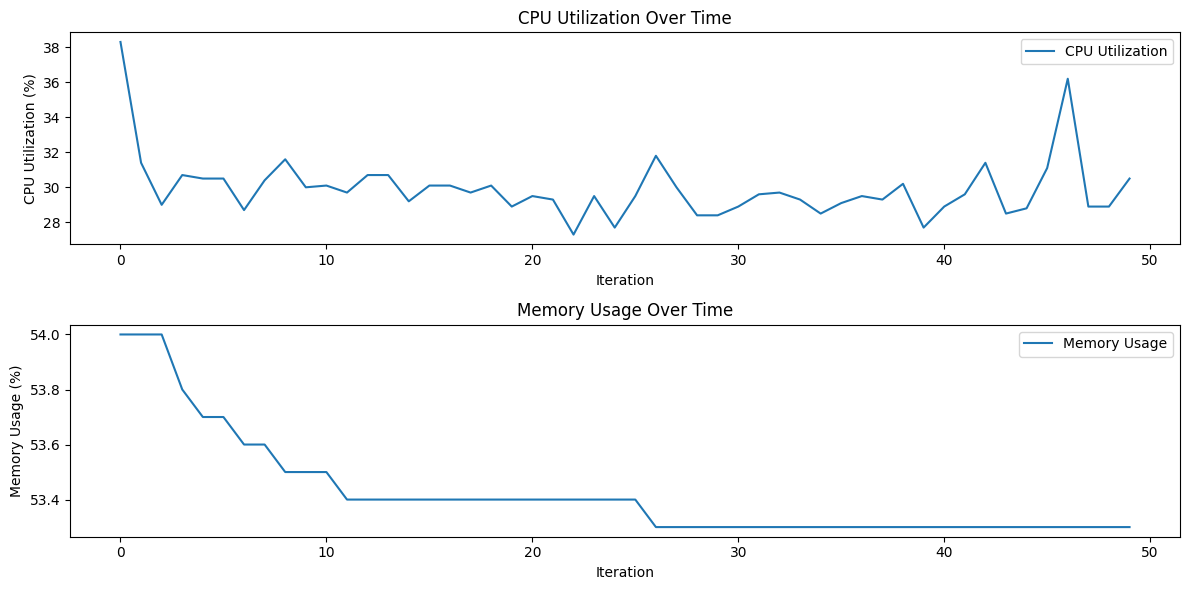

In [5]:
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt

def build_tree(X, y, max_depth=None):
    num_samples, num_features = X.shape
    unique_classes = np.unique(y)

    if len(unique_classes) == 1 or (max_depth is not None and max_depth == 0):
        return {'class': unique_classes[0], 'count': len(y)}

    best_feature, best_threshold = find_best_split(X, y)

    left_indices = X[:, best_feature] <= best_threshold
    right_indices = ~left_indices

    left_tree = build_tree(X[left_indices], y[left_indices], max_depth=max_depth - 1)
    right_tree = build_tree(X[right_indices], y[right_indices], max_depth=max_depth - 1)

    return {
        'feature_index': best_feature,
        'threshold': best_threshold,
        'left': left_tree,
        'right': right_tree
    }

def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    for feature_index in range(num_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            left_indices = X[:, feature_index] <= threshold
            right_indices = ~left_indices

            gini_left = calculate_gini(y[left_indices])
            gini_right = calculate_gini(y[right_indices])

            gini = (len(y[left_indices]) / num_samples) * gini_left + \
                   (len(y[right_indices]) / num_samples) * gini_right

            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def train_random_forest(X, y, n_estimators=100, max_depth=None):
    trees = []
    cpu_utilization = []
    memory_usage = []
    training_times = []

    for _ in range(n_estimators):
        start_time = time.time()

        # Log CPU utilization
        cpu_percent = psutil.cpu_percent(interval=1)
        cpu_utilization.append(cpu_percent)

        # Log memory usage
        memory_percent = psutil.virtual_memory().percent
        memory_usage.append(memory_percent)

        # Randomly sample data with replacement (bootstrapping)
        indices = np.random.choice(len(X), len(X), replace=True)
        X_bootstrap = X[indices]
        y_bootstrap = y[indices]

        # Train a decision tree on the bootstrapped data
        tree = build_tree(X_bootstrap, y_bootstrap, max_depth=max_depth)
        trees.append(tree)

        end_time = time.time()
        training_time = end_time - start_time
        training_times.append(training_time)

    return trees, cpu_utilization, memory_usage, training_times

def predict_random_forest(trees, X):
    predictions = np.array([predict_tree(x, tree) for x in X for tree in trees])
    predictions = predictions.reshape(len(X), len(trees))
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)

def predict_tree(x, tree):
    if 'class' in tree:
        return tree['class']
    else:
        if x[tree['feature_index']] <= tree['threshold']:
            return predict_tree(x, tree['left'])
        else:
            return predict_tree(x, tree['right'])

# Generate synthetic data for demonstration
np.random.seed(42)
X_synthetic = np.random.rand(100, 5)
y_synthetic = (X_synthetic[:, 0] + X_synthetic[:, 1] + X_synthetic[:, 2] > 1.5).astype(int)

# Train Random Forest and log resource utilization
start_time = time.time()
trees, cpu_logs, memory_logs, _ = train_random_forest(X_synthetic, y_synthetic, n_estimators=50, max_depth=3)
end_time = time.time()
training_time = end_time - start_time

# Plot CPU and memory utilization over time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(cpu_logs, label='CPU Utilization')
plt.title('CPU Utilization Over Time')
plt.xlabel('Iteration')
plt.ylabel('CPU Utilization (%)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(memory_logs, label='Memory Usage')
plt.title('Memory Usage Over Time')
plt.xlabel('Iteration')
plt.ylabel('Memory Usage (%)')
plt.legend()
# Print information
average_cpu = np.mean(cpu_logs)
average_memory = np.mean(memory_logs)
average_time = np.mean(training_times)

print(f"Average CPU Utilization: {average_cpu:.2f}%")
print(f"Average Memory Usage: {average_memory:.2f}%")
print(f"Average Training Time: {training_time:.2f} seconds")



plt.tight_layout()
plt.show()


Average CPU Utilization: 31.64%
Average Memory Usage: 53.32%
Average Training Time: 54.33 seconds


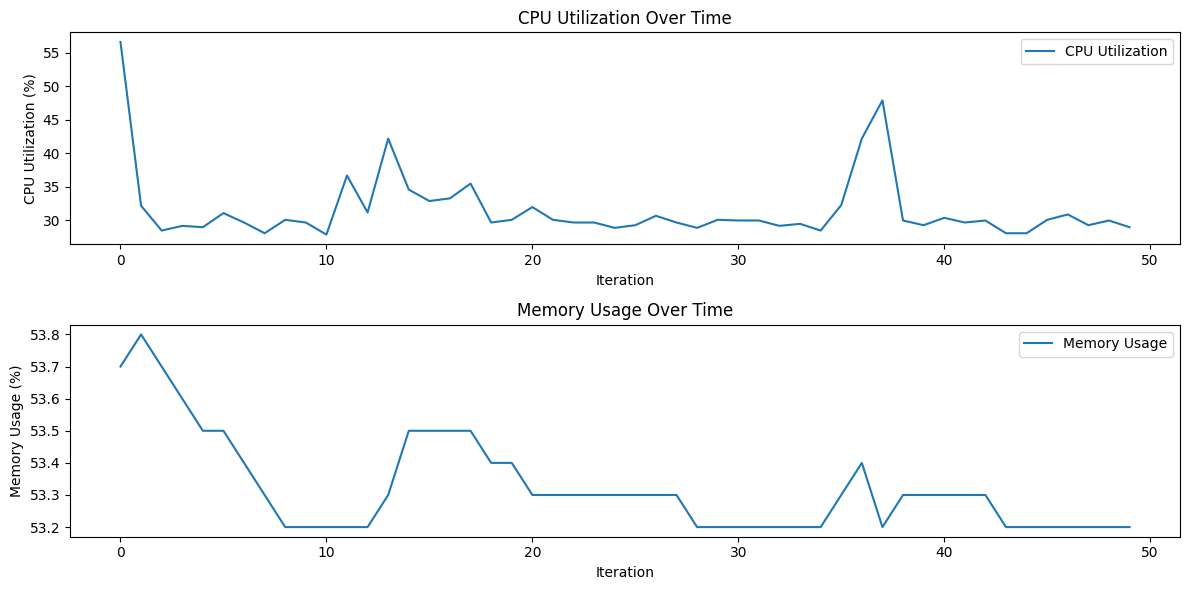

In [6]:
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt

def build_tree(X, y, max_depth=None):
    num_samples, num_features = X.shape
    unique_classes = np.unique(y)

    if len(unique_classes) == 1 or (max_depth is not None and max_depth == 0):
        return {'class': unique_classes[0], 'count': len(y)}

    best_feature, best_threshold = find_best_split(X, y)

    left_indices = X[:, best_feature] <= best_threshold
    right_indices = ~left_indices

    left_tree = build_tree(X[left_indices], y[left_indices], max_depth=max_depth - 1)
    right_tree = build_tree(X[right_indices], y[right_indices], max_depth=max_depth - 1)

    return {
        'feature_index': best_feature,
        'threshold': best_threshold,
        'left': left_tree,
        'right': right_tree
    }

def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    for feature_index in range(num_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            left_indices = X[:, feature_index] <= threshold
            right_indices = ~left_indices

            gini_left = calculate_gini(y[left_indices])
            gini_right = calculate_gini(y[right_indices])

            gini = (len(y[left_indices]) / num_samples) * gini_left + \
                   (len(y[right_indices]) / num_samples) * gini_right

            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def train_random_forest(X, y, n_estimators=100, max_depth=None):
    trees = []
    cpu_utilization = []
    memory_usage = []
    training_times = []

    for _ in range(n_estimators):
        start_time = time.time()

        # Log CPU utilization
        cpu_percent = psutil.cpu_percent(interval=1)
        cpu_utilization.append(cpu_percent)

        # Log memory usage
        memory_percent = psutil.virtual_memory().percent
        memory_usage.append(memory_percent)

        # Randomly sample data with replacement (bootstrapping)
        indices = np.random.choice(len(X), len(X), replace=True)
        X_bootstrap = X[indices]
        y_bootstrap = y[indices]

        # Train a decision tree on the bootstrapped data
        tree = build_tree(X_bootstrap, y_bootstrap, max_depth=max_depth)
        trees.append(tree)

        end_time = time.time()
        training_time = end_time - start_time
        training_times.append(training_time)

    return trees, cpu_utilization, memory_usage, training_times

def predict_random_forest(trees, X):
    predictions = np.array([predict_tree(x, tree) for x in X for tree in trees])
    predictions = predictions.reshape(len(X), len(trees))
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)

def predict_tree(x, tree):
    if 'class' in tree:
        return tree['class']
    else:
        if x[tree['feature_index']] <= tree['threshold']:
            return predict_tree(x, tree['left'])
        else:
            return predict_tree(x, tree['right'])

# Generate synthetic data for demonstration
np.random.seed(42)
X_synthetic = np.random.rand(100, 5)
y_synthetic = (X_synthetic[:, 0] + X_synthetic[:, 1] + X_synthetic[:, 2] > 1.5).astype(int)

# Train Random Forest and log resource utilization
start_time = time.time()
trees, cpu_logs, memory_logs, _ = train_random_forest(X_synthetic, y_synthetic, n_estimators=50, max_depth=3)
end_time = time.time()
training_time = end_time - start_time

# Plot CPU and memory utilization over time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(cpu_logs, label='CPU Utilization')
plt.title('CPU Utilization Over Time')
plt.xlabel('Iteration')
plt.ylabel('CPU Utilization (%)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(memory_logs, label='Memory Usage')
plt.title('Memory Usage Over Time')
plt.xlabel('Iteration')
plt.ylabel('Memory Usage (%)')
plt.legend()
# Print information
average_cpu = np.mean(cpu_logs)
average_memory = np.mean(memory_logs)
average_time = np.mean(training_times)

print(f"Average CPU Utilization: {average_cpu:.2f}%")
print(f"Average Memory Usage: {average_memory:.2f}%")
print(f"Average Training Time: {training_time:.2f} seconds")



plt.tight_layout()
plt.show()


Average CPU Utilization: 32.51%
Average Memory Usage: 51.83%
Average Training Time: 54.36 seconds


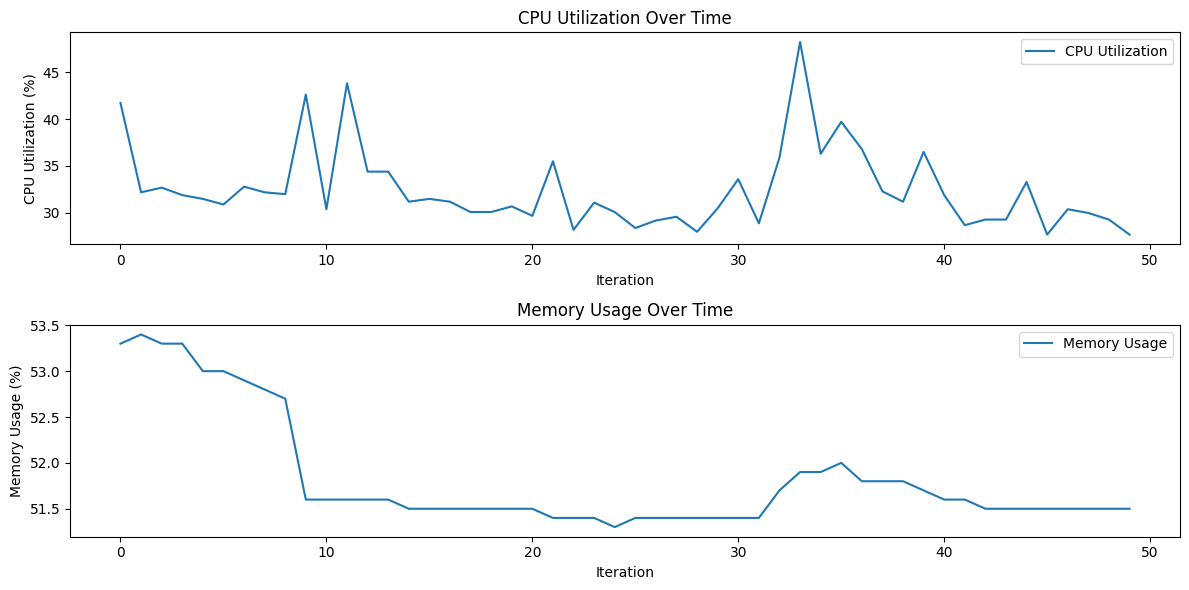

In [7]:
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt

def build_tree(X, y, max_depth=None):
    num_samples, num_features = X.shape
    unique_classes = np.unique(y)

    if len(unique_classes) == 1 or (max_depth is not None and max_depth == 0):
        return {'class': unique_classes[0], 'count': len(y)}

    best_feature, best_threshold = find_best_split(X, y)

    left_indices = X[:, best_feature] <= best_threshold
    right_indices = ~left_indices

    left_tree = build_tree(X[left_indices], y[left_indices], max_depth=max_depth - 1)
    right_tree = build_tree(X[right_indices], y[right_indices], max_depth=max_depth - 1)

    return {
        'feature_index': best_feature,
        'threshold': best_threshold,
        'left': left_tree,
        'right': right_tree
    }

def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    for feature_index in range(num_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            left_indices = X[:, feature_index] <= threshold
            right_indices = ~left_indices

            gini_left = calculate_gini(y[left_indices])
            gini_right = calculate_gini(y[right_indices])

            gini = (len(y[left_indices]) / num_samples) * gini_left + \
                   (len(y[right_indices]) / num_samples) * gini_right

            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def train_random_forest(X, y, n_estimators=100, max_depth=None):
    trees = []
    cpu_utilization = []
    memory_usage = []
    training_times = []

    for _ in range(n_estimators):
        start_time = time.time()

        # Log CPU utilization
        cpu_percent = psutil.cpu_percent(interval=1)
        cpu_utilization.append(cpu_percent)

        # Log memory usage
        memory_percent = psutil.virtual_memory().percent
        memory_usage.append(memory_percent)

        # Randomly sample data with replacement (bootstrapping)
        indices = np.random.choice(len(X), len(X), replace=True)
        X_bootstrap = X[indices]
        y_bootstrap = y[indices]

        # Train a decision tree on the bootstrapped data
        tree = build_tree(X_bootstrap, y_bootstrap, max_depth=max_depth)
        trees.append(tree)

        end_time = time.time()
        training_time = end_time - start_time
        training_times.append(training_time)

    return trees, cpu_utilization, memory_usage, training_times

def predict_random_forest(trees, X):
    predictions = np.array([predict_tree(x, tree) for x in X for tree in trees])
    predictions = predictions.reshape(len(X), len(trees))
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)

def predict_tree(x, tree):
    if 'class' in tree:
        return tree['class']
    else:
        if x[tree['feature_index']] <= tree['threshold']:
            return predict_tree(x, tree['left'])
        else:
            return predict_tree(x, tree['right'])

# Generate synthetic data for demonstration
np.random.seed(42)
X_synthetic = np.random.rand(100, 5)
y_synthetic = (X_synthetic[:, 0] + X_synthetic[:, 1] + X_synthetic[:, 2] > 1.5).astype(int)

# Train Random Forest and log resource utilization
start_time = time.time()
trees, cpu_logs, memory_logs, _ = train_random_forest(X_synthetic, y_synthetic, n_estimators=50, max_depth=3)
end_time = time.time()
training_time = end_time - start_time

# Plot CPU and memory utilization over time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(cpu_logs, label='CPU Utilization')
plt.title('CPU Utilization Over Time')
plt.xlabel('Iteration')
plt.ylabel('CPU Utilization (%)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(memory_logs, label='Memory Usage')
plt.title('Memory Usage Over Time')
plt.xlabel('Iteration')
plt.ylabel('Memory Usage (%)')
plt.legend()
# Print information
average_cpu = np.mean(cpu_logs)
average_memory = np.mean(memory_logs)
average_time = np.mean(training_times)

print(f"Average CPU Utilization: {average_cpu:.2f}%")
print(f"Average Memory Usage: {average_memory:.2f}%")
print(f"Average Training Time: {training_time:.2f} seconds")



plt.tight_layout()
plt.show()


# Average Calculation of Time

In [8]:
def calculate_average_time(times):
    if not times:
        return 0  # Avoid division by zero if the list is empty
    total_seconds = sum(time.total_seconds() for time in times)
    average_seconds = total_seconds / len(times)
    average_time = timedelta(seconds=average_seconds)
    return average_time

In [9]:
from datetime import timedelta

time_values = [timedelta( seconds=54.32),
               timedelta( seconds=54.38 ),
               timedelta( seconds=54.32),
               timedelta( seconds=54.33 ),
               timedelta( seconds=54.36)]

average_time = calculate_average_time(time_values)
print(f"Average Time: {average_time}")

Average Time: 0:00:54.342000


# Average Percentage Calculations of Memory and Cpu utilization:

In [11]:
def calculate_average_percentage(percentages):
    if not percentages:
        return 0  # Avoid division by zero if the list is empty
    total_percentage = sum(percentages)
    average_percentage = total_percentage / len(percentages)
    return average_percentage

In [12]:
percentage_values = [32.75,34.19,29.93,31.64,32.51]

average_percentage = calculate_average_percentage(percentage_values)
print(f"Average Percentage of Cpu utilization: {average_percentage}%")

Average Percentage of Cpu utilization: 32.20399999999999%


In [14]:
percentage_values = [53.53,53.47,53.42,53.32,51.83]

average_percentage = calculate_average_percentage(percentage_values)
print(f"Average Percentage of Memory Utilization: {average_percentage}%")

Average Percentage of Memory Utilization: 53.114%


# Conversion Of Percentage Value to normal Value

In [15]:
def percentage_to_normal(percentage):
    
    normal_value = percentage / 100.0
    return normal_value

# Example usage:
percentage_value = 32.20
normal_value = percentage_to_normal(percentage_value)

print(f"{percentage_value}% is equivalent to {normal_value} as a normal value.")

32.2% is equivalent to 0.322 as a normal value.


# Power Utilization Of This Algo

In [16]:
Power=((1-0.322)*10)+(0.322*(77))
Power

31.573999999999998

# Energy Consumption:

In [17]:
Energy=54.34*31.573999999999998
Energy

1715.73116